In [18]:
import pandas as pd
import gstlearn as gl
import gstlearn.plot as gp
import gstlearn.document as gdoc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
gdoc.setNoScroll()

data = 'data/pdh_data.parquet'

<IPython.core.display.Javascript object>

In [19]:
df = pd.read_parquet(data)
df

category        lat       lon  \
0       Known PFAS user  52.504114 -0.682637   
1       Known PFAS user  50.871865  6.034522   
2       Known PFAS user  50.223409  8.765597   
3       Known PFAS user  47.858601  5.347156   
4       Known PFAS user  39.471674 -0.538828   
...                 ...        ...       ...   
478045            Known  52.245160  7.337400   
478046            Known  51.940830  8.045450   
478047            Known  51.060010  7.027150   
478048            Known  51.025880  8.145160   
478049            Known  51.657850  8.408000   

                                       name          city         country  \
0                                        3F         Corby  United Kingdom   
1                                        3M      Kerkrade     Netherlands   
2        3P - Performance Plastics Products        Karben         Germany   
3          3P Performance Plastics Products       Langres          France   
4       3P Productos Plásticos Performantes      Valencia           Spain   
...                                     ...           ...             ...   
478045                        WW.Offlum.019  Neuenkirchen         Germany   
478046                 WW.Vohren.Dackmar.54     Warendorf         Germany   
478047                  Westermann Lev EB 9    Leverkusen         Germany   
478048                             Wolbecke   Kirchhundem         Germany   
478049                   Ächterheide Ost B1     Lippstadt         Germany   

                     type                                      sector  \
0         Industrial site                                        None   
1         Industrial site  Manufacture of rubber and plastic products   
2         Industrial site  Manufacture of rubber and plastic products   
3         Industrial site  Manufacture of rubber and plastic products   
4         Industrial site  Manufacture of rubber and plastic products   
...                   ...                                         ...   
478045  Sampling location                                        None   
478046  Sampling location                                        None   
478047  Sampling location                                        None   
478048  Sampling location                                        None   
478049  Sampling location                                        None   

            source_type                                        source_text  \
0       Company website                                                 3F   
1       Company website                                                 3M   
2       Company website                                                3P    
3       Company website                                                3P    
4       Company website                                                3P    
...                 ...                                                ...   
478045      Authorities  Database ELWAS | Landesamt für Natur, Umwelt u...   
478046      Authorities  Database ELWAS | Landesamt für Natur, Umwelt u...   
478047      Authorities  Database ELWAS | Landesamt für Natur, Umwelt u...   
478048      Authorities  Database ELWAS | Landesamt für Natur, Umwelt u...   
478049      Authorities  Database ELWAS | Landesamt für Natur, Umwelt u...   

                                               source_url  dataset_id  \
0                                 https://www.3fff.co.uk/           0   
1       https://www.3mdeutschland.de/3M/de_DE/presse-d...           0   
2       https://www.3pcorporate.com//wp-content/upload...           0   
3       https://www.haute-marne.gouv.fr/content/downlo...           0   
4       https://www.3pcorporate.com//wp-content/upload...           0   
...                                                   ...         ...   
478045  https://www.opengeodata.nrw.de/produkte/umwelt...         130   
478046  https://www.opengeodata.nrw.de/produkte/umwelt...         130   
478047  https://www.opengeodata.nrw.de/pro

In [20]:

df.category.unique()

array(['Known PFAS user', 'Presumptive', 'Known'], dtype=object)

In [21]:
df_num = df[df.category=='Known']
df_num = df_num.drop(['name','city','type','sector','source_type','source_text','source_url','dataset_name','details'],axis=1)
df_num_surf = df_num[df_num.matrix=='Surface water']
df_num_surf

category        lat       lon         country  dataset_id  \
12991     Known  50.808932  3.352552         Belgium          10   
12992     Known  51.016507  4.088303         Belgium          10   
12993     Known  51.042282  3.548967         Belgium          10   
12994     Known  51.771554  6.605953         Germany          10   
12995     Known  49.590101  7.603395         Germany          10   
...         ...        ...       ...             ...         ...   
476204    Known  51.796320  0.190570  United Kingdom         129   
476205    Known  51.796320  0.190570  United Kingdom         129   
476206    Known  51.796320  0.190570  United Kingdom         129   
476207    Known  51.658000 -1.422160  United Kingdom         129   
476208    Known  51.658000 -1.422160  United Kingdom         129   

                                              pfas_values  unit  pfas_sum  \
12991   [{"cas_id": "335-67-1", "unit": "ng/l", "subst...  ng/l    130.00   
12992   [{"cas_id": "335-67-1", "unit": "ng/l", "subst...  ng/l    200.00   
12993   [{"cas_id": "335-67-1", "unit": "ng/l", "subst...  ng/l  42400.00   
12994   [{"cas_id": "335-67-1", "unit": "ng/l", "subst...  ng/l     50.00   
12995   [{"cas_id": "307-24-4", "unit": "ng/l", "subst...  ng/l    580.00   
...                                                   ...   ...       ...   
476204  [{"cas_id": "335-67-1", "unit": "ng/l", "subst...  ng/l     35.18   
476205  [{"cas_id": "335-24-0", "unit": "ng/l", "subst...  ng/l    120.50   
476206  [{"cas_id": "2706-90-3", "unit": "ng/l", "subs...  ng/l     40.81   
476207  [{"cas_id": "375-22-4", "unit": "ng/l", "subst...  ng/l      3.45   
476208  [{"cas_id": "375-73-5", "unit": "ng/l", "subst...  ng/l     10.30   

               matrix        date    year  
12991   Surface water        None  2018.0  
12992   Surface water        None  2017.0  
12993   Surface water        None  2016.0  
12994   Surface water        None  2017.0  
12995   Surface water        None  2018.0  
...               ...         ...     ...  
476204  Surface water  2023-04-28  2023.0  
476205  Surface water  2023-08-09  2023.0  
476206  Surface water  2023-12-01  2023.0  
476207  Surface water  2023-04-24  2023.0  
476208  Surface water  2023-08-15  2023.0  

[273192 rows x 11 columns]

In [22]:
df_num_surf_france = df_num_surf[df_num_surf.country == 'France']

lat_min, lat_max = 41.0, 51.2
lon_min, lon_max = -5.1, 9.6 # On ne veut que la France métropolitaine

df_num_surf_france = df_num_surf_france[(df_num_surf_france['lat'] >= lat_min) & (df_num_surf_france['lat'] <= lat_max) & 
               (df_num_surf_france['lon'] >= lon_min) & (df_num_surf_france['lon'] <= lon_max)]


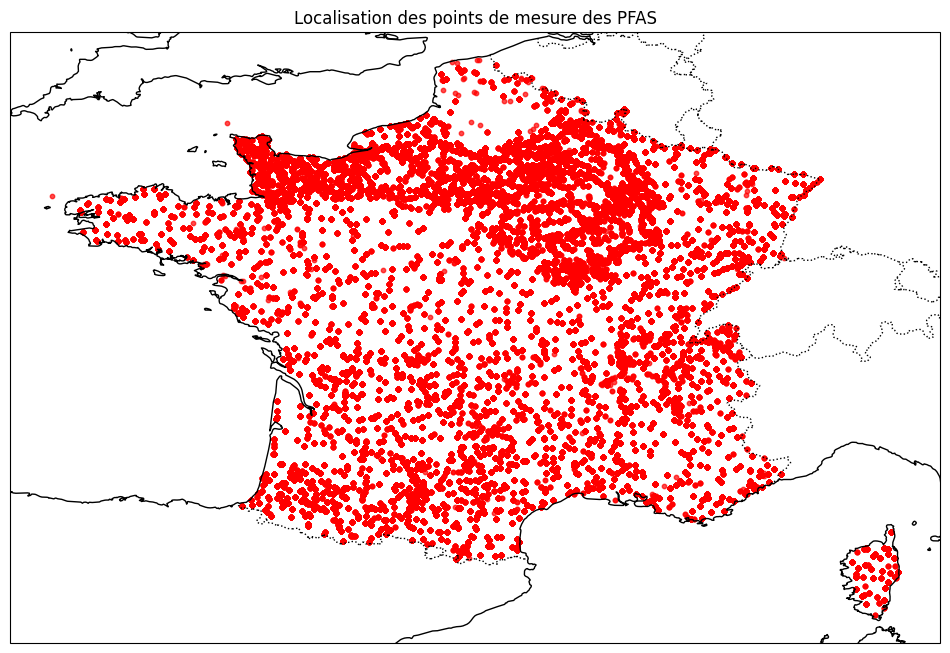

In [23]:
# Créer la figure et les axes avec la projection appropriée
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter des traits côtiers pour un meilleur contexte géographique
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Tracer les points de latitude et longitude
ax.scatter(df_num_surf_france['lon'], df_num_surf_france['lat'], color='red', s=10, alpha=0.7, transform=ccrs.PlateCarree())

# Ajouter des labels et un titre
ax.set_title('Localisation des points de mesure des PFAS')
plt.show()

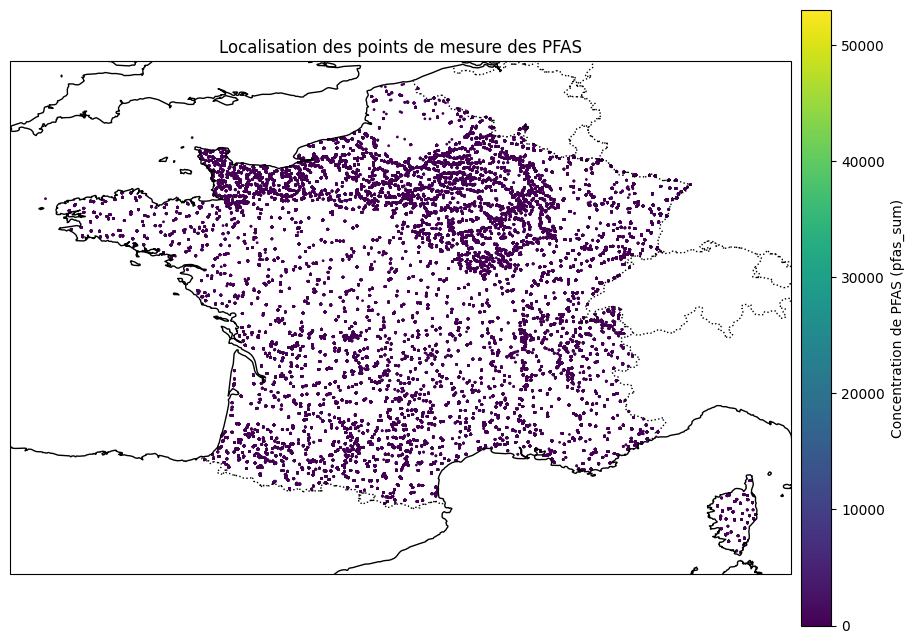

In [24]:
# Créer la figure et les axes avec la projection appropriée
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter des traits côtiers et des frontières pour un meilleur contexte géographique
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Définir les valeurs de sum_pfas pour colorer les points
values = df_num_surf_france['pfas_sum']

# Tracer les points de latitude et longitude avec une coloration selon sum_pfas
scatter = ax.scatter(df_num_surf_france['lon'], df_num_surf_france['lat'],
                     c=values, cmap='viridis', s=1, alpha=1, transform=ccrs.PlateCarree())

# Ajouter une barre de couleur pour indiquer les valeurs de concentration des PFAS
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Concentration de PFAS (pfas_sum)')

# Ajouter des labels et un titre
ax.set_title('Localisation des points de mesure des PFAS')
plt.show()

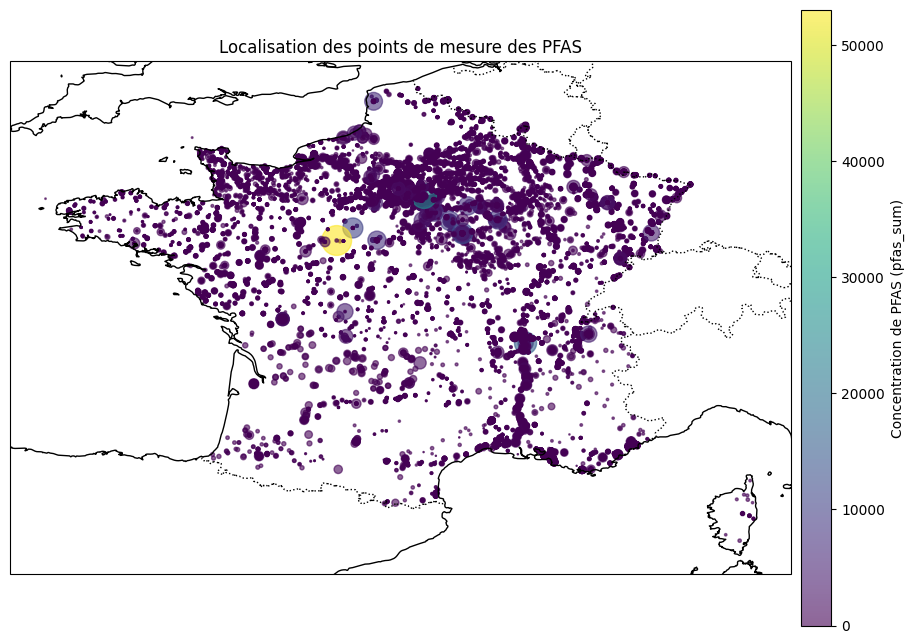

In [25]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Créer la figure et les axes avec la projection appropriée
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter des traits côtiers et des frontières pour un meilleur contexte géographique
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Définir les valeurs de pfas_sum pour la couleur et la taille des points
values = df_num_surf_france['pfas_sum']

# Définir une échelle de taille en fonction de pfas_sum
# On utilise une transformation (racine carrée) pour éviter que les points ne deviennent trop grands
sizes = 2 * np.sqrt(values)  # Ajuster le coefficient (ici 20) pour changer l'échelle globale des tailles

# Tracer les points de latitude et longitude avec une coloration et une taille dépendant de pfas_sum
scatter = ax.scatter(df_num_surf_france['lon'], df_num_surf_france['lat'],
                     c=values, cmap='viridis', s=sizes, alpha=0.6, transform=ccrs.PlateCarree())

# Ajouter une barre de couleur pour indiquer les valeurs de concentration des PFAS
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Concentration de PFAS (pfas_sum)')

# Ajouter des labels et un titre
ax.set_title('Localisation des points de mesure des PFAS')

# Afficher la figure
plt.show()


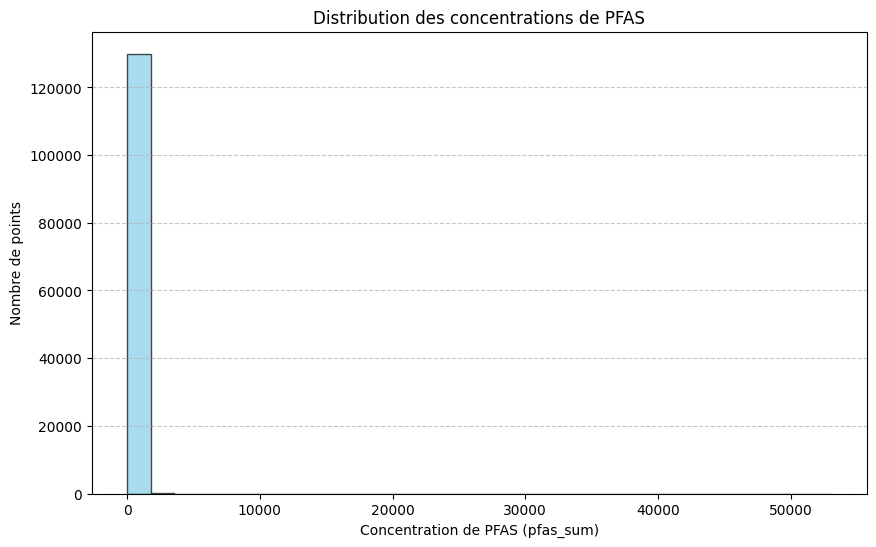

In [26]:

# Définir les valeurs de pfas_sum à partir du DataFrame
values = df_num_surf_france['pfas_sum']

# Créer l'histogramme avec 10 classes (bins)
plt.figure(figsize=(10, 6))
plt.hist(values, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Ajouter des labels et un titre
plt.xlabel('Concentration de PFAS (pfas_sum)')
plt.ylabel('Nombre de points')
plt.title('Distribution des concentrations de PFAS')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher l'histogramme
plt.show()

In [27]:

# Calculer le 99ème percentile
percentile_99 = np.percentile(values, 99)

# Afficher le résultat
print(f"Le 99ème percentile des concentrations de PFAS est : {percentile_99}")

Le 99ème percentile des concentrations de PFAS est : 109.97599999999947


### Seuillage

In [17]:
# On fixe les valeurs aberrantes à 110 pour la lisibilité
df_num_surf_france['pfas_sum'] = np.clip(df_num_surf_france['pfas_sum'], None, 110)

# Afficher un aperçu des données mises à jour
df_num_surf_france.head()

category        lat       lon country  dataset_id  \
13537    Known  42.444155  2.161042  France          12   
13563    Known  43.199694  5.870111  France          12   
13564    Known  43.199694  5.870111  France          12   
13572    Known  43.291111  2.989250  France          12   
13573    Known  43.291111  2.989250  France          12   

                                             pfas_values  unit  pfas_sum  \
13537  [{"cas_id": "335-67-1", "unit": "ng/l", "subst...  ng/l    110.00   
13563  [{"cas_id": "335-67-1", "unit": "ng/l", "subst...  ng/l      0.09   
13564  [{"cas_id": "355-46-4", "unit": "ng/l", "subst...  ng/l      0.01   
13572  [{"cas_id": "335-67-1", "unit": "ng/l", "subst...  ng/l      0.16   
13573  [{"cas_id": "1763-23-1", "unit": "ng/l", "subs...  ng/l      0.02   

              matrix  date    year  
13537  Surface water  None  2010.0  
13563  Surface water  None  2009.0  
13564  Surface water  None  2009.0  
13572  Surface water  None  2009.0  
13573  Surface water  None  2009.0

In [28]:
%matplotlib qt
# Créer la figure et les axes avec la projection appropriée
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter des traits côtiers et des frontières pour un meilleur contexte géographique
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Définir les valeurs de pfas_sum pour la couleur et la taille des points
values = df_num_surf_france['pfas_sum']

# Définir une échelle de taille en fonction de pfas_sum
# On utilise une transformation (racine carrée) pour éviter que les points ne deviennent trop grands
sizes = 2 * np.sqrt(values)  # Ajuster le coefficient (ici 20) pour changer l'échelle globale des tailles

# Tracer les points de latitude et longitude avec une coloration et une taille dépendant de pfas_sum
scatter = ax.scatter(df_num_surf_france['lon'], df_num_surf_france['lat'],
                     c=values, cmap='viridis', s=sizes, alpha=0.6, transform=ccrs.PlateCarree())

# Ajouter une barre de couleur pour indiquer les valeurs de concentration des PFAS
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Concentration de PFAS (pfas_sum)')

# Ajouter des labels et un titre
ax.set_title('Localisation des points de mesure des PFAS')

# Afficher la figure
plt.show()


### Suppression des doublons les plus faibles

In [29]:
# Longueur initiale du DataFrame
initial_length = len(df_num_surf_france)

# Trier le DataFrame par latitude, longitude et pfas_sum (par ordre décroissant)
df_num_surf_france = df_num_surf_france.sort_values(by=['lat', 'lon', 'pfas_sum'], ascending=[True, True, False])

# Supprimer les doublons basés sur lat et lon, en gardant uniquement la première occurrence (valeur de pfas_sum la plus élevée)
df_num_surf_france = df_num_surf_france.drop_duplicates(subset=['lat', 'lon'], keep='first')

# Longueur après suppression des doublons
final_length = len(df_num_surf_france)

# Calculer et afficher le nombre de doublons supprimés
duplicates_removed = initial_length - final_length
print(f"Nombre de doublons supprimés : {duplicates_removed}")


Nombre de doublons supprimés : 125235


In [30]:
np.sort(df_num_surf_france.year.unique())

array([2005., 2006., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015., 2016., 2017., 2018., 2019., 2020., 2021., 2022., 2023.,
       2024.])

In [31]:
%matplotlib qt
# Créer la figure et les axes avec la projection appropriée
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter des traits côtiers et des frontières pour un meilleur contexte géographique
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Définir les valeurs de pfas_sum pour la couleur et la taille des points
values = df_num_surf_france['pfas_sum']

# Définir une échelle de taille en fonction de pfas_sum
# On utilise une transformation (racine carrée) pour éviter que les points ne deviennent trop grands
sizes = 2 * np.sqrt(values)  # Ajuster le coefficient (ici 20) pour changer l'échelle globale des tailles

# Tracer les points de latitude et longitude avec une coloration et une taille dépendant de pfas_sum
scatter = ax.scatter(df_num_surf_france['lon'], df_num_surf_france['lat'],
                     c=values, cmap='viridis', s=sizes, alpha=0.6, transform=ccrs.PlateCarree())

# Ajouter une barre de couleur pour indiquer les valeurs de concentration des PFAS
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Concentration de PFAS (pfas_sum)')

# Ajouter des labels et un titre
ax.set_title('Localisation des points de mesure des PFAS')

# Afficher la figure
plt.show()


In [75]:
df_num_surf_france.to_parquet("pfas_france_pretraite.parquet")

In [32]:
df_num_surf_france

category        lat       lon country  dataset_id  \
342134    Known  41.458298  9.145714  France          29   
325566    Known  41.576726  9.291149  France          29   
325433    Known  41.655659  8.981629  France          29   
342128    Known  41.667497  9.206354  France          29   
325521    Known  41.718255  9.303876  France          29   
...         ...        ...       ...     ...         ...   
197792    Known  50.920182  2.622923  France          29   
197403    Known  50.954702  1.955888  France          29   
197858    Known  50.966087  1.874074  France          29   
197404    Known  50.999365  2.293940  France          29   
197405    Known  51.011476  2.331203  France          29   

                                              pfas_values  unit  pfas_sum  \
342134  [{"cas_id": "375-22-4", "unit": "ng/l", "subst...  ng/l       0.0   
325566  [{"cas_id": "376-06-7", "unit": "ng/l", "subst...  ng/l       0.0   
325433  [{"cas_id": "375-22-4", "unit": "ng/l", "subst...  ng/l       0.0   
342128  [{"cas_id": "307-24-4", "unit": "ng/l", "subst...  ng/l       9.0   
325521  [{"cas_id": "376-06-7", "unit": "ng/l", "subst...  ng/l       0.0   
...                                                   ...   ...       ...   
197792  [{"cas_id": "307-24-4", "unit": "ng/l", "subst...  ng/l      11.7   
197403  [{"cas_id": "335-67-1", "unit": "ng/l", "subst...  ng/l       0.0   
197858  [{"cas_id": "335-67-1", "unit": "ng/l", "subst...  ng/l       0.0   
197404  [{"cas_id": "335-67-1", "unit": "ng/l", "subst...  ng/l       0.0   
197405  [{"cas_id": "335-67-1", "unit": "ng/l", "subst...  ng/l       0.0   

               matrix        date    year  
342134  Surface water  2018-03-15  2018.0  
325566  Surface water  2014-01-15  2014.0  
325433  Surface water  2016-01-14  2016.0  
342128  Surface water  2020-06-10  2020.0  
325521  Surface water  2014-01-13  2014.0  
...               ...         ...     ...  
197792  Surface water  2022-08-22  2022.0  
197403  Surface water  2010-06-23  2010.0  
197858  Surface water  2010-06-23  2010.0  
197404  Surface water  2010-06-23  2010.0  
197405  Surface water  2010-06-23  2010.0  

[4790 rows x 11 columns]

# Reprise

In [2]:
import numpy as np
import pandas as pd
import gstlearn as gl
import gstlearn.plot as gp
import gstlearn.document as gdoc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pyproj
gdoc.setNoScroll()

data = r'data\pfas_2023_surf_ground_drink.parquet'

<IPython.core.display.Javascript object>

In [3]:
df_num_surf_france = pd.read_parquet(data)
df_db = df_num_surf_france[['lat','lon','pfas_sum']]
df_db

lat       lon  pfas_sum
194750  41.392351  9.165047       4.1
194743  41.695461  8.948481       0.0
325551  41.718255  9.303876       0.0
194730  41.754673  8.859828       0.0
325421  41.768722  9.173763       0.0
...           ...       ...       ...
159310  50.787268  1.975412       0.0
159329  50.798708  2.143868       0.0
159250  50.834486  1.686862       0.0
159292  50.894631  1.839508       0.0
159230  50.934294  1.765432       0.0

[4120 rows x 3 columns]

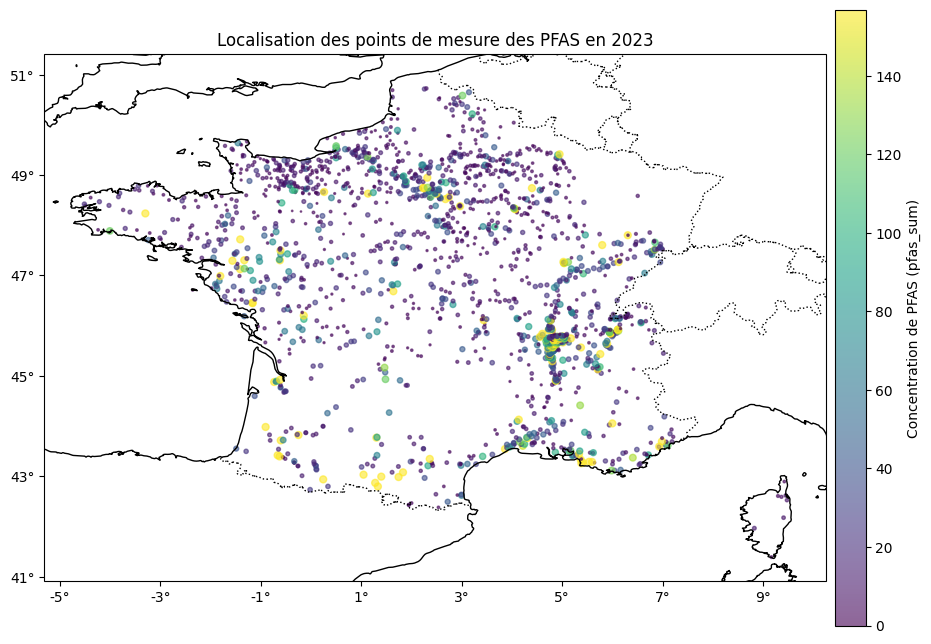

In [96]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Créer la figure et les axes avec la projection appropriée
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter des traits côtiers et des frontières pour un meilleur contexte géographique
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Définir les valeurs de pfas_sum pour la couleur et la taille des points
values = df_num_surf_france['pfas_sum']

# Définir une échelle de taille en fonction de pfas_sum
# On utilise une transformation (racine carrée) pour éviter que les points ne deviennent trop grands
sizes = 2 * np.sqrt(values)  # Ajuster le coefficient pour changer l'échelle globale des tailles

# Tracer les points de latitude et longitude avec une coloration et une taille dépendant de pfas_sum
scatter = ax.scatter(df_db['lon'], df_db['lat'],
                     c=values, cmap='viridis', s=sizes, alpha=0.6)

# Ajouter une barre de couleur pour indiquer les valeurs de concentration des PFAS
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Concentration de PFAS (pfas_sum)')

# Ajouter des ticks sur les axes x et y
ax.set_xticks(np.arange(-5, 10, 2), crs=ccrs.PlateCarree())  # Ajuster la plage selon tes besoins
ax.set_yticks(np.arange(41, 52, 2), crs=ccrs.PlateCarree())  # Ajuster la plage selon tes besoins

# Ajouter des labels aux ticks des axes x et y
ax.set_xticklabels([f'{lon}°' for lon in np.arange(-5, 10, 2)], fontsize=10)
ax.set_yticklabels([f'{lat}°' for lat in np.arange(41, 52, 2)], fontsize=10)

# Ajouter un titre
ax.set_title('Localisation des points de mesure des PFAS en 2023')

# Afficher la figure
plt.show()


#### Init de la db

In [3]:
dat = gl.Db_fromPanda(df_db)
dat.setLocators(["lon","lat"], gl.ELoc.X)
dat.setLocator("pfas_sum", gl.ELoc.Z)
dat


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 3
Total number of samples      = 4120

Variables
---------
Column = 0 - Name = lat - Locator = x2
Column = 1 - Name = lon - Locator = x1
Column = 2 - Name = pfas_sum - Locator = z1

In [4]:
varioParamOmni = gl.VarioParam.createOmniDirection(100)
grid_pfas = gl.db_vcloud(dat, varioParamOmni)
grid_pfas.display()


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 4
Total number of samples      = 10000

Grid characteristics:
---------------------
Origin :      0.000     0.000
Mesh   :      0.171    27.464
Number :        100       100

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x1 - Locator = x1
Column = 2 - Name = x2 - Locator = x2
Column = 3 - Name = Cloud.pfas_sum - Locator = NA


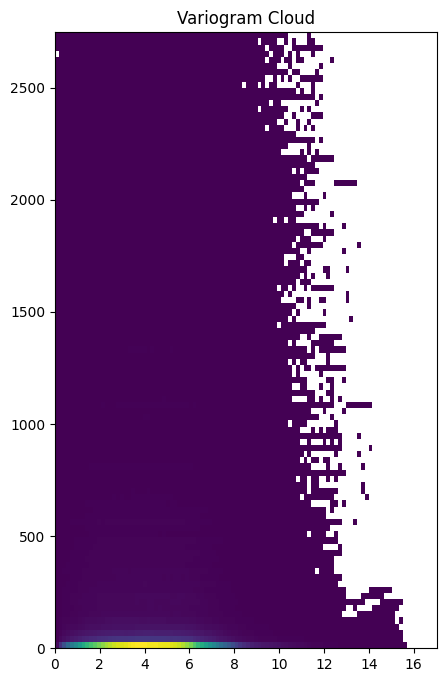

In [100]:
%matplotlib inline
ax = grid_pfas.plot("Cloud.pfas_sum")
plt.gca().set_aspect('0.01')
ax.decoration(title="Variogram Cloud")

#### Variogramme expérimental

In [5]:
varioParamOmni = gl.VarioParam.createOmniDirection(npas=70, dpas=0.005, toldis=0.2)
varioexp = gl.Vario(varioParamOmni)
err = varioexp.compute(dat)

In [6]:
varioexp


Variogram characteristics
Number of variable(s)       = 1
Number of direction(s)      = 1
Space dimension             = 2
Variable(s)                 = [pfas_sum]

Variance-Covariance Matrix   915.238

Direction #1
------------
Number of lags              = 70
Direction coefficients      =      1.000     0.000
Direction angles (degrees)  =      0.000
Tolerance on direction      =     90.000 (degrees)
Calculation lag             =      0.005
Tolerance on distance       =     20.000 (Percent of the lag value)

For variable 1
      Rank    Npairs  Distance     Value
         0   157.000     0.000   131.818
         1    83.000     0.005   844.897
         2    70.000     0.010   780.623
         3    90.000     0.015   982.840
         4   202.000     0.020   659.814
         5   128.000     0.025   896.061
         6   128.000     0.030  1114.083
         7   153.000     0.035  1149.297
         8   127.000     0.040   871.417
         9   142.000     0.045  1349.211
        10   131.00

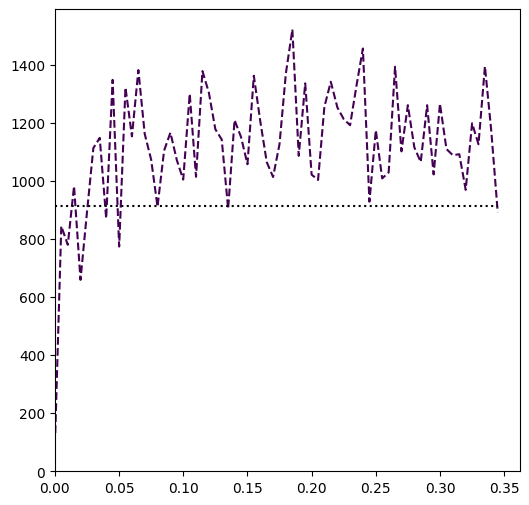

In [7]:
%matplotlib inline
gp.setDefault(dims=[6,6])
gp.varmod(varioexp)
plt.show()

#### Fit du modèle (doit être changé, modèle avec pépite + réduire la portée du variogramme pour des résultats plus propres)

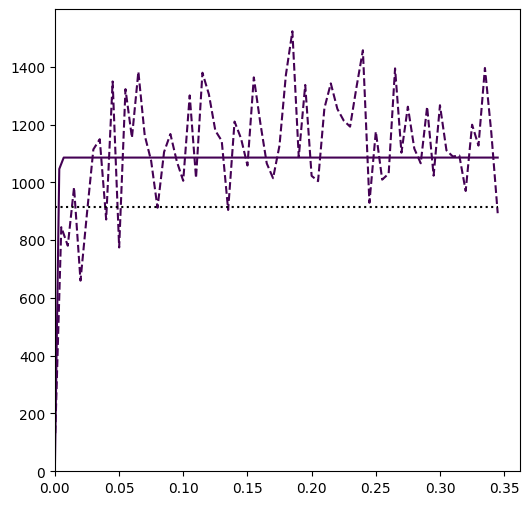

In [8]:
fitmod = gl.Model()
err = fitmod.fit(varioexp)

gp.varmod(varioexp, fitmod)
plt.show()

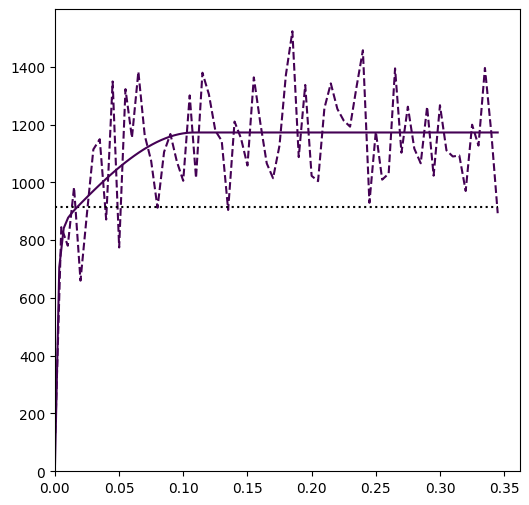

In [9]:
fitmod = gl.Model()
types = [gl.ECov.NUGGET, gl.ECov.EXPONENTIAL ,gl.ECov.SPHERICAL]
err = fitmod.fit(varioexp, types=types)

gp.varmod(varioexp, fitmod)
plt.show()

In [10]:
fitmod


Model characteristics
Space dimension              = 2
Number of variable(s)        = 1
Number of basic structure(s) = 2
Number of drift function(s)  = 0
Number of drift equation(s)  = 0

Covariance Part
---------------
Exponential
- Sill         =    833.547
- Range        =      0.006
- Theo. Range  =      0.002
Spherical
- Sill         =    339.059
- Range        =      0.109
Total Sill     =   1172.606
Known Mean(s)     0.000

#### Je passe le variogramme directionnel car je ne pense pas que cela soit cohérent dans notre cas (pas de raison de penser que la contamination aux pfas dépende de l'angle). Vérification avec une carte de variogramme directionnel:

In [122]:
grid_vmap = gl.db_vmap(dat)

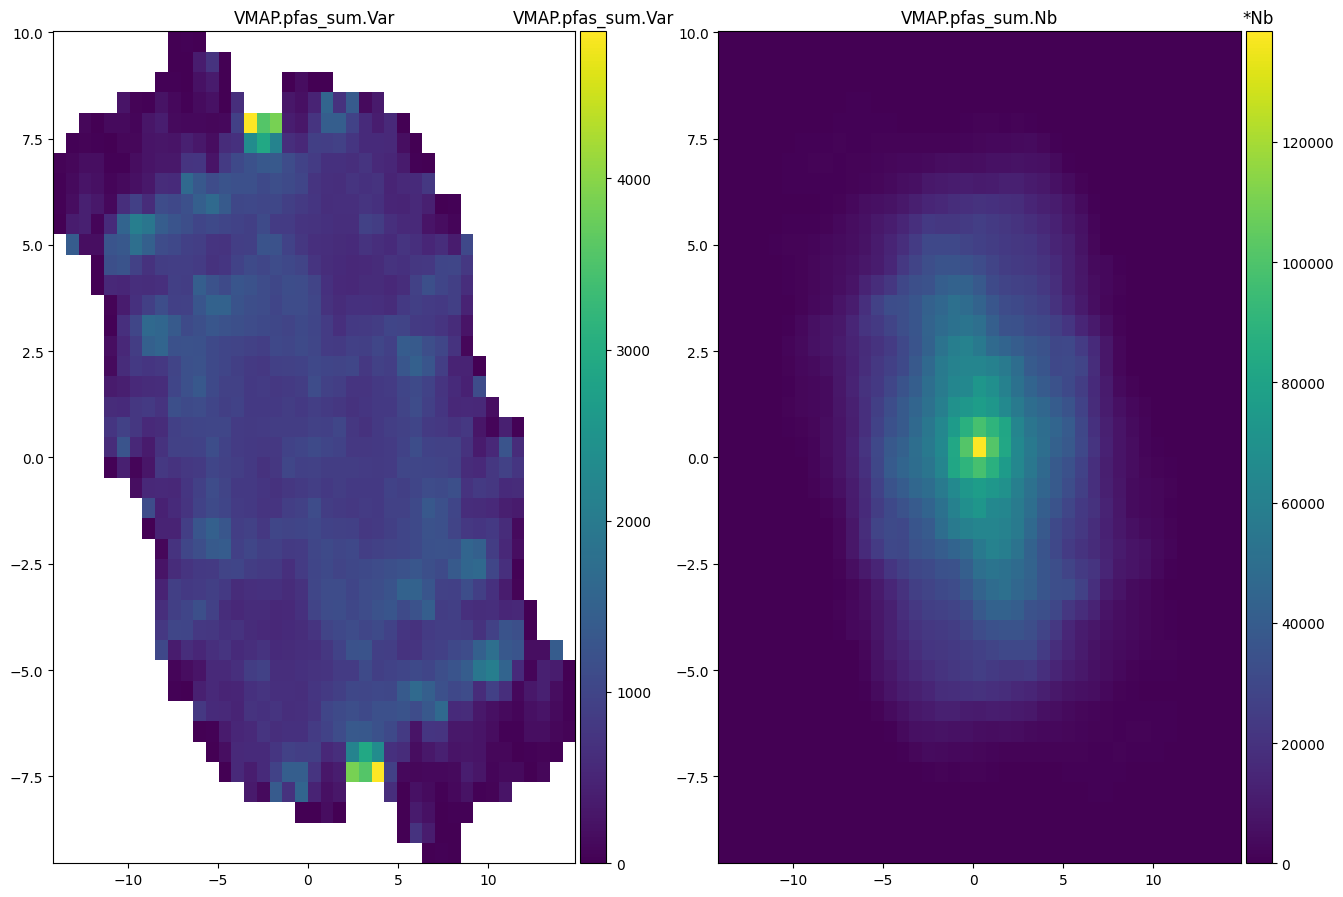

In [123]:
fig, ax = plt.subplots(1,2,figsize=[14,10])
fig.tight_layout(pad=5.0)
ax[0].raster(grid_vmap, flagLegend=True)
ax[1].raster(grid_vmap, name="*Nb", flagLegend=True)
plt.show()

##### Aucune tendance claire ne semble émerger. On semble cependant avoir un plus grand nombre de couples de points sur la verticale que sur l'horizontale (mais peut importe)

### Krigeage

In [124]:
dat.getExtremas()

array([[-4.605194,  9.534594],
       [41.392351, 50.934294]])

In [13]:
grid = gl.DbGrid.create(x0=[-5.5,41],dx=[0.1,0.1],nx=[160,110])

In [14]:
dbfmt = gl.DbStringFormat.createFromFlags(flag_extend=True)
grid.display(dbfmt)


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 3
Total number of samples      = 17600

Grid characteristics:
---------------------
Origin :     -5.500    41.000
Mesh   :      0.100     0.100
Number :        160       110

Data Base Extension
-------------------
Coor #1 - Min =     -5.500 - Max =     10.400 - Ext = 15.9
Coor #2 - Min =     41.000 - Max =     51.900 - Ext = 10.9

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x1 - Locator = x1
Column = 2 - Name = x2 - Locator = x2


In [72]:
uniqueNeigh = gl.NeighUnique.create()

In [127]:
err = gl.kriging(dbin=dat, dbout=grid, model=fitmod, 
              neigh=uniqueNeigh,
              flag_est=True, flag_std=True, flag_varz=False,
              namconv=gl.NamingConvention("SK")
              )

In [128]:
grid


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 5
Total number of samples      = 17600

Grid characteristics:
---------------------
Origin :     -5.500    41.000
Mesh   :      0.100     0.100
Number :        160       110

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x1 - Locator = x1
Column = 2 - Name = x2 - Locator = x2
Column = 3 - Name = SK.pfas_sum.estim - Locator = z1
Column = 4 - Name = SK.pfas_sum.stdev - Locator = NA

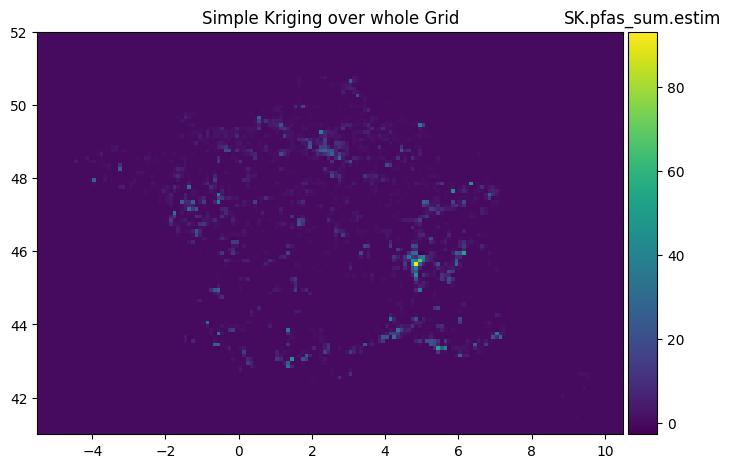

In [129]:
gp.setDefaultGeographic(dims=[8,8])

fig, ax = gp.initGeographic()
ax.raster(grid, flagLegend=True)
# ax.symbol(dat, c='black', alpha=0.03)
ax.decoration(title="Simple Kriging over whole Grid")
plt.show()

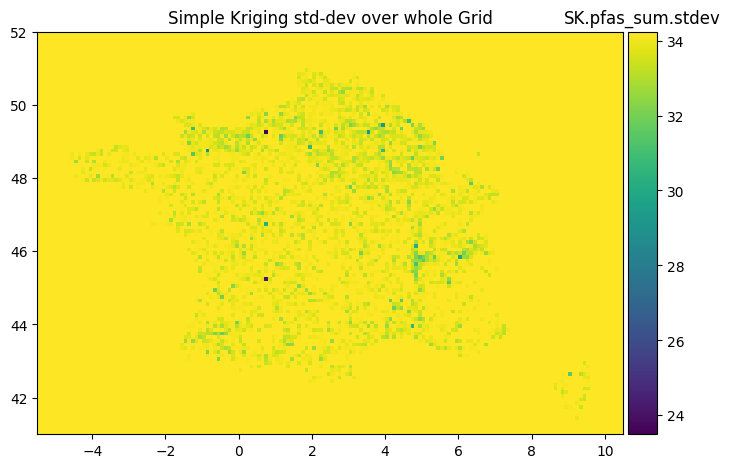

In [130]:
fig, ax = gp.initGeographic()
ax.raster(grid, name="SK.pfas_sum.stdev", flagLegend=True)
# ax.symbol(dat, c='black', alpha = 0.1)
ax.decoration(title="Simple Kriging std-dev over whole Grid")
plt.show()

## Krigeage ordinaire

In [15]:
fitmodOK = fitmod.clone()
err = fitmodOK.addDrift(gl.DriftM())

In [71]:
err = gl.kriging(dbin=dat, dbout=grid, model=fitmodOK, 
              neigh=uniqueNeigh,
              flag_est=True, flag_std=True, flag_varz=False,
              namconv=gl.NamingConvention("OK")
              )

NameError: name 'uniqueNeigh' is not defined

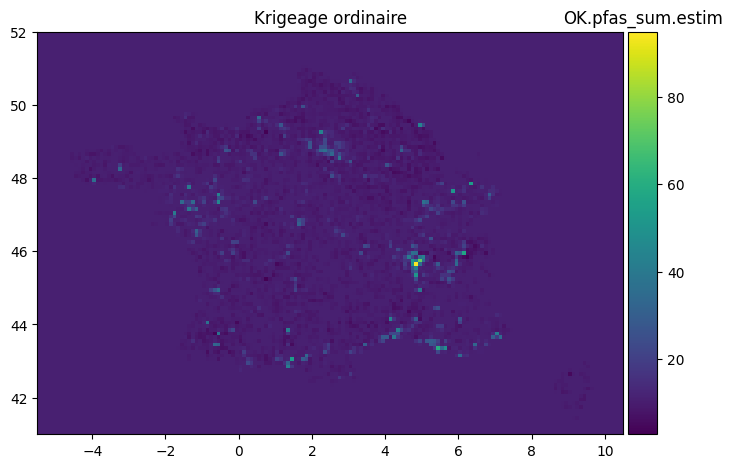

In [134]:
fig, ax = gp.initGeographic()
ax.raster(grid, name="OK.pfas_sum.estim", flagLegend=True)
# ax.symbol(dat, c='black')
ax.decoration(title="Krigeage ordinaire")
plt.show()

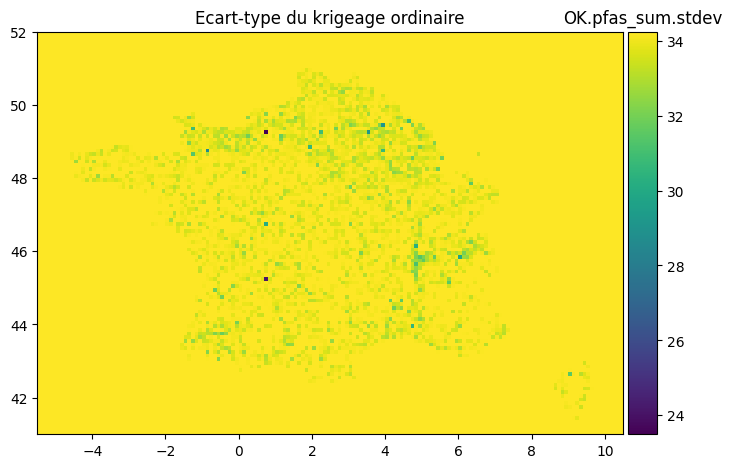

In [135]:
fig, ax = gp.initGeographic()
ax.raster(grid, name="OK.pfas_sum.stdev", flagLegend=True)
# ax.symbol(dat, c='black')
ax.decoration(title="Ecart-type du krigeage ordinaire")
plt.show()

Comparons Krigeage ordinaire et simple avec une corrélation entre leurs valeurs

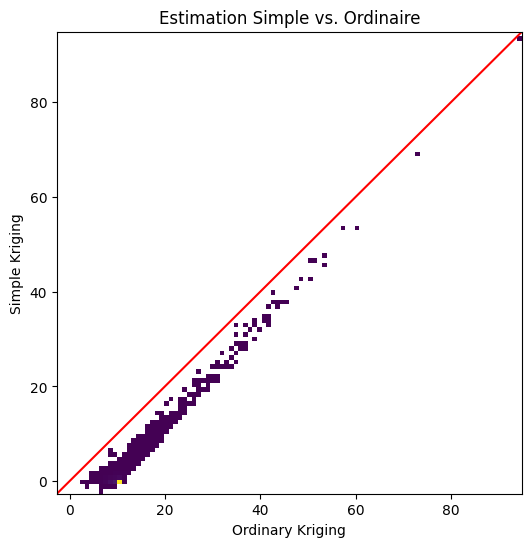

In [136]:
ax = gp.correlation(grid,namex="OK.pfas_sum.estim", namey="SK.pfas_sum.estim", 
                    bissLine=True, bins=100, flagSameAxes=True, cmin=1)
ax.decoration(title="Estimation Simple vs. Ordinaire", 
              xlabel="Ordinary Kriging", ylabel="Simple Kriging")

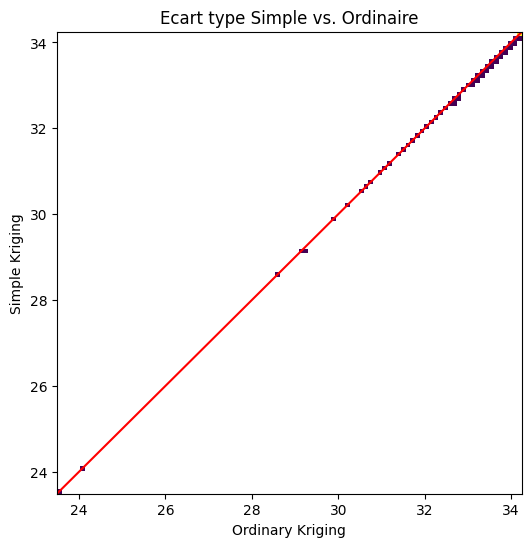

In [137]:
ax = gp.correlation(grid,namex="OK.pfas_sum.stdev", namey="SK.pfas_sum.stdev", 
                    bissLine=True, bins=100, flagSameAxes=True, cmin=1)
ax.decoration(title="Ecart type Simple vs. Ordinaire", 
              xlabel="Ordinary Kriging", ylabel="Simple Kriging")

## Validation croisée / Validation des résultats en KO à voisinage infini

In [139]:
err = gl.xvalid(db=dat, model=fitmodOK, neigh=uniqueNeigh, 
             flag_xvalid_est=1, flag_xvalid_std=1,  
             namconv=gl.NamingConvention.create("Xvalid", flag_locator = False)
            )

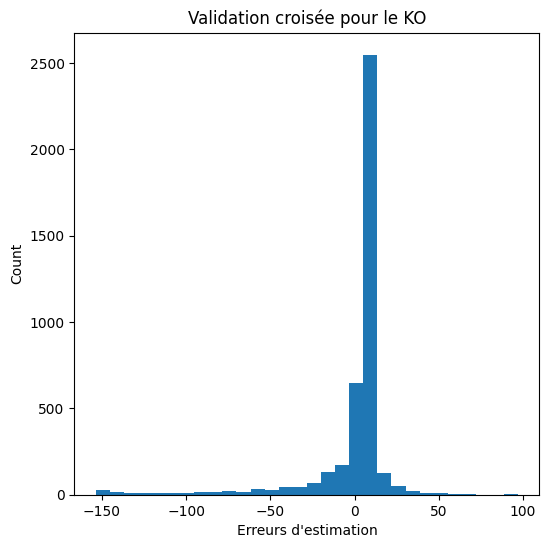

In [144]:
ax = gp.histogram(dat,name="*esterr*",bins=30,fill="red")
ax.decoration(xlabel="Erreurs d'estimation",title="Validation croisée pour le KO")

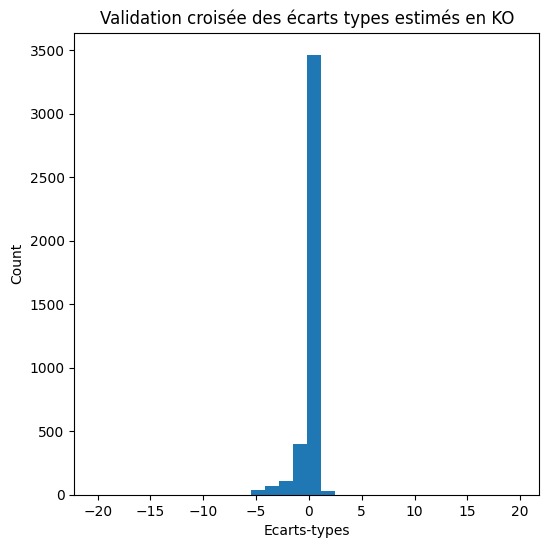

In [143]:
ax = gp.histogram(dat,name="*stderr*",bins=30,fill="blue")
ax.decoration(xlabel="Ecarts-types", title="Validation croisée des écarts types estimés en KO")

In [145]:
print("Mean cross-validation error:",round(np.nanmean(dat.getColumn("*esterr*")),4))
print("Mean squared cross-validation error:",round(np.nanmean(np.square(dat.getColumn("*esterr*"))),4))
print("Mean standardized error:",round(np.nanmean(np.square(dat.getColumn("*stderr*"))),4))

Mean cross-validation error: 0.1364
Mean squared cross-validation error: 716.3818
Mean standardized error: 1.0085


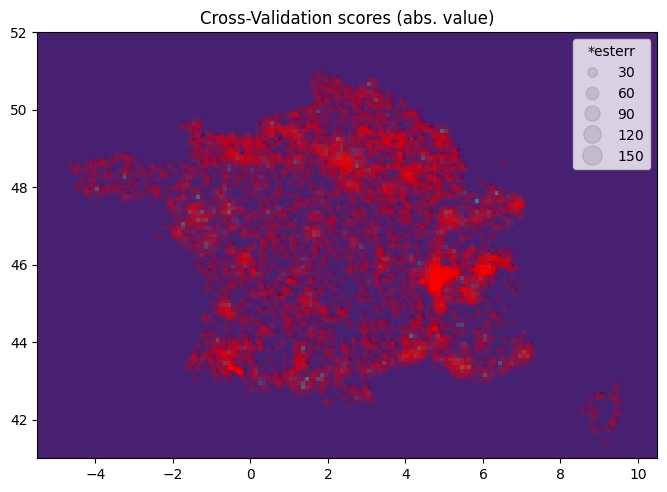

In [148]:
fig, ax = gp.initGeographic()
ax.raster(grid)
ax.symbol(dat,nameSize="*esterr", flagAbsSize=True, flagLegendSize=True, alpha=0.1)
ax.decoration(title="Cross-Validation scores (abs. value)")
plt.show()

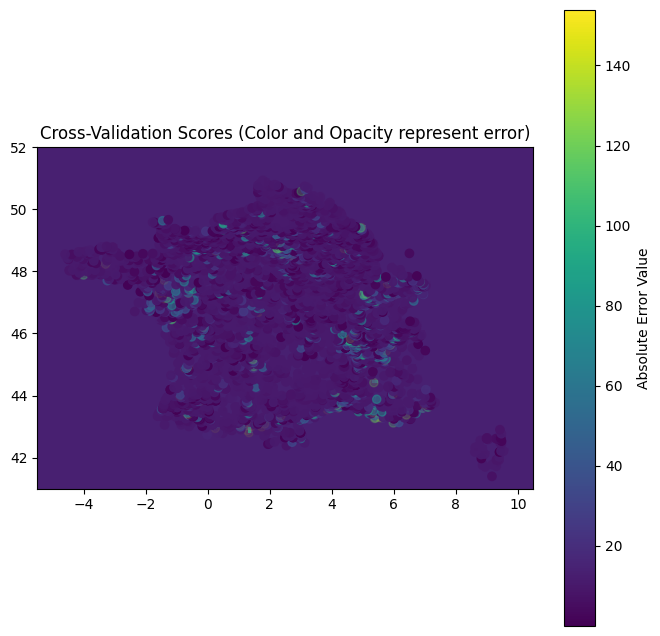

In [165]:
fig, ax = gp.initGeographic()

# Affichage de l'arrière-plan du raster
ax.raster(grid)

# Normalisation de l'erreur pour qu'elle varie entre 0 et 1, puis inversion pour alpha
# Alpha sera 1 pour les petites erreurs et proche de 0 pour les grandes erreurs
normalized_error = (abs(dat["*esterr"])) / (abs(dat["*esterr"]).max())
alpha_values = 1 - normalized_error

# Utiliser scatter pour représenter l'erreur en couleur et en opacité
scatter = ax.scatter(
    dat["lon"], 
    dat["lat"], 
    c=abs(dat["*esterr"]),      # Utilisation de l'erreur comme couleur
    cmap="viridis",         # Choix de la colormap
    alpha=alpha_values,     # Opacité dépendante de l'erreur
)

# Ajouter une barre de couleur pour interpréter les valeurs
cbar = plt.colorbar(scatter, ax=ax, orientation="vertical")
cbar.set_label("Absolute Error Value")

# Ajouter un titre
ax.set_title("Cross-Validation Scores (Color and Opacity represent error)")

plt.show()

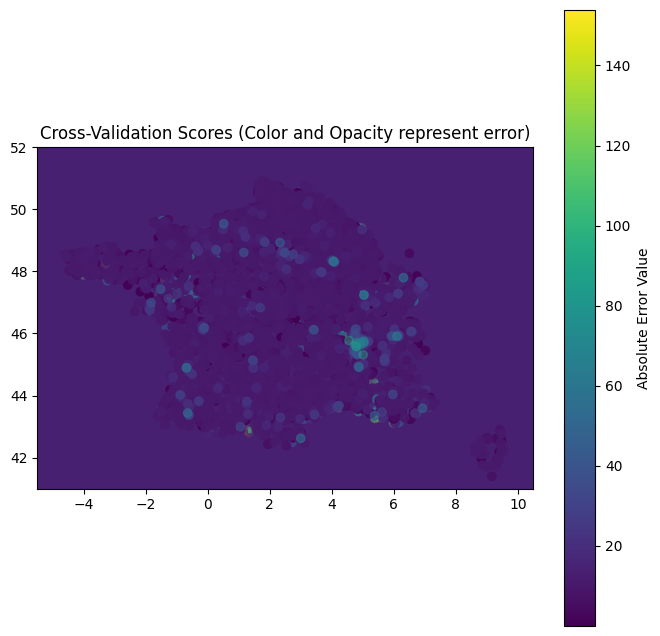

In [167]:
# Trier les données en utilisant la méthode appropriée pour les objets gstlearn
# Extraire les données nécessaires à partir de l'objet 'dat'
lon = dat["lon"]
lat = dat["lat"]
esterr = dat["*esterr"]

data = pd.DataFrame({
    "lon": lon,
    "lat": lat,
    "esterr": esterr
})

# Trier le DataFrame par ordre croissant d'erreur absolue afin que les petits points soient en dessous des gros
data_sorted = data.sort_values(by="esterr", ascending=True)

# Normalisation de l'erreur pour qu'elle varie entre 0 et 1, puis inversion pour alpha
# Alpha sera 1 pour les petites erreurs et proche de 0 pour les grandes erreurs
normalized_error = (abs(data_sorted["esterr"])) / (abs(data_sorted["esterr"]).max())
alpha_values = 1 - normalized_error

# Initialiser la figure géographique
fig, ax = gp.initGeographic()

# Affichage de l'arrière-plan du raster
ax.raster(grid)

# Utiliser scatter pour représenter l'erreur en couleur et en opacité
scatter = ax.scatter(
    data_sorted["lon"], 
    data_sorted["lat"], 
    c=abs(data_sorted["esterr"]),      # Utilisation de l'erreur comme couleur
    cmap="viridis",         # Choix de la colormap
    alpha=alpha_values,      # Opacité dépendante de l'erreur
)

# Ajouter une barre de couleur pour interpréter les valeurs
cbar = plt.colorbar(scatter, ax=ax, orientation="vertical")
cbar.set_label("Absolute Error Value")

# Ajouter un titre
ax.set_title("Cross-Validation Scores (Color and Opacity represent error)")

# Afficher la figure
plt.show()


# Krigeage ordinaire à voisinage mobile

In [26]:
movingNeigh = gl.NeighMoving.create(radius=1) # 1°~80km

In [16]:
err = gl.kriging(dbin=dat, dbout=grid, model=fitmodOK, neigh=movingNeigh,
              flag_est=True, flag_std=True, 
              namconv=gl.NamingConvention("movingMedium"))

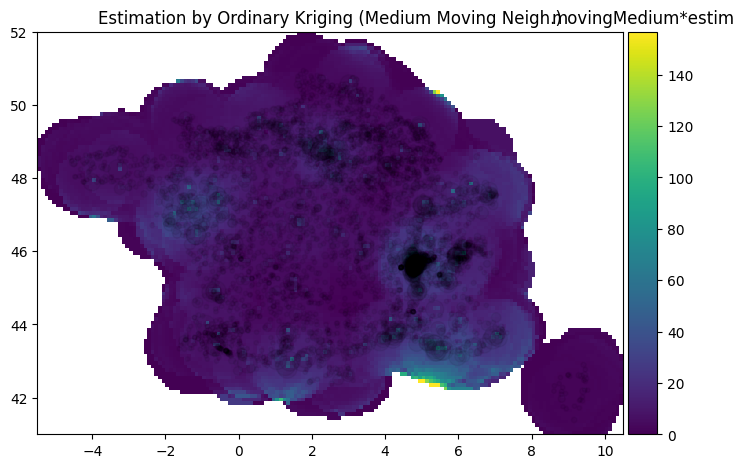

In [20]:
fig, ax = gp.initGeographic()
ax.raster(grid, name="movingMedium*estim", flagLegend=True)
ax.symbol(dat, c='black', alpha = 0.05)
ax.decoration(title="Estimation by Ordinary Kriging (Medium Moving Neigh.)")
plt.show()

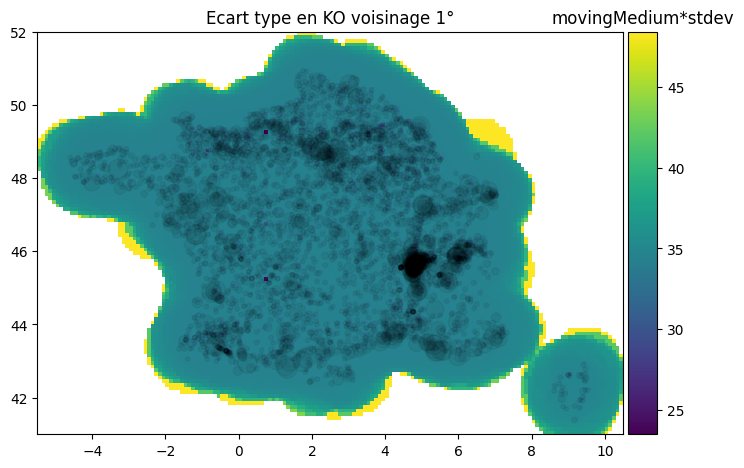

In [22]:
fig, ax = gp.initGeographic()
ax.raster(grid, name="movingMedium*stdev", flagLegend=True)
ax.symbol(dat, c='black', alpha = 0.05)
ax.decoration(title="Ecart type en KO voisinage 1°")
plt.show()

In [31]:
smallNeigh = gl.NeighMoving.create(radius=0.2) # 1°~80km ici 16km double du range variogramme

In [32]:
err = gl.kriging(dbin=dat, dbout=grid, model=fitmodOK, neigh=smallNeigh,
              flag_est=True, flag_std=True, 
              namconv=gl.NamingConvention("movingSmall"))

No variable name corresponding to your criterion


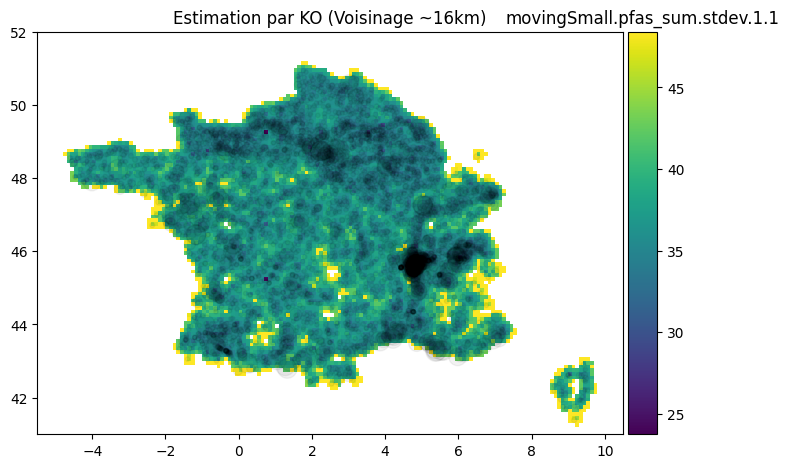

In [33]:
fig, ax = gp.initGeographic()
ax.raster(grid, name="smallMedium*estim", flagLegend=True)
ax.symbol(dat, c='black', alpha = 0.05)
ax.decoration(title="Estimation par KO (Voisinage ~16km)")
plt.show()

## Mettons un nombre de points minimum pour limiter les effets de bord

In [61]:
lessSmallNeigh = gl.NeighMoving.create(radius=0.5, nmini=5) # 1°~80km ici 40km quintuple du range variogramme
err = gl.kriging(dbin=dat, dbout=grid, model=fitmodOK, neigh=lessSmallNeigh,
              flag_est=True, flag_std=True, 
              namconv=gl.NamingConvention("lessSmall"))

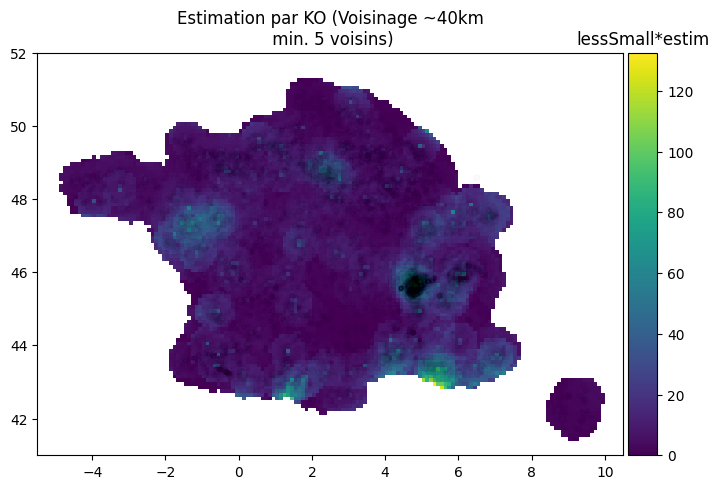

In [62]:
fig, ax = gp.initGeographic()
ax.raster(grid, name="lessSmall*estim", flagLegend=True)
ax.symbol(dat, c='black', alpha = 0.02)
ax.decoration(title="Estimation par KO (Voisinage ~40km\n min. 5 voisins)")
plt.show()

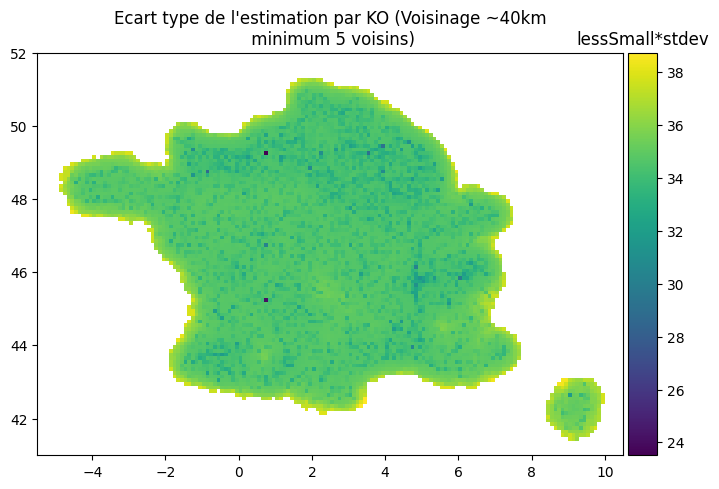

In [64]:
fig, ax = gp.initGeographic()
ax.raster(grid, name="lessSmall*stdev", flagLegend=True)
# ax.symbol(dat, c='black', alpha = 0.02)
ax.decoration(title="Ecart type de l'estimation par KO (Voisinage ~40km\n minimum 5 voisins)")
plt.show()

In [65]:
err = gl.xvalid(db=dat, model=fitmodOK, neigh=lessSmallNeigh, 
             flag_xvalid_est=1, flag_xvalid_std=1,  
             namconv=gl.NamingConvention.create("Xvalid", flag_locator = False)
            )

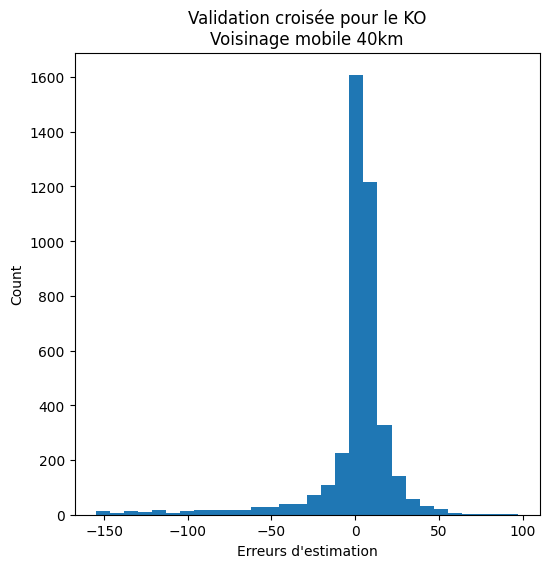

In [68]:
ax = gp.histogram(dat,name="*esterr*",bins=30,fill="r")
ax.decoration(xlabel="Erreurs d'estimation",title="Validation croisée pour le KO\nVoisinage mobile 40km")

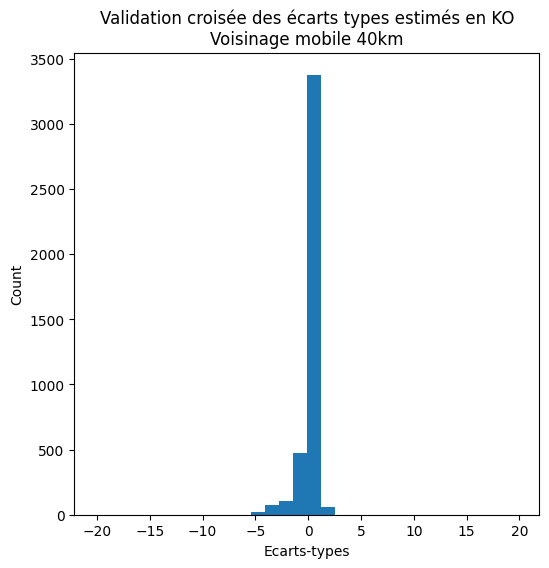

In [69]:
ax = gp.histogram(dat,name="*stderr*",bins=30,fill="blue")
ax.decoration(xlabel="Ecarts-types", title="Validation croisée des écarts types estimés en KO\nVoisinage mobile 40km")

No variable name corresponding to your criterion
No variable name corresponding to your criterion
No variable name corresponding to your criterion
No variable name corresponding to your criterion
No variable name corresponding to your criterion
No variable name corresponding to your criterion
No variable name corresponding to your criterion
No variable name corresponding to your criterion
No variable name corresponding to your criterion
No variable name corresponding to your criterion
No variable name corresponding to your criterion
No variable name corresponding to your criterion
No variable name corresponding to your criterion
No variable name corresponding to your criterion
No variable name corresponding to your criterion
No variable name corresponding to your criterion
No variable name corresponding to your criterion
No variable name corresponding to your criterion
No variable name corresponding to your criterion
No variable name corresponding to your criterion
No variable name cor

AttributeError: 'NoneType' object has no attribute 'decoration'

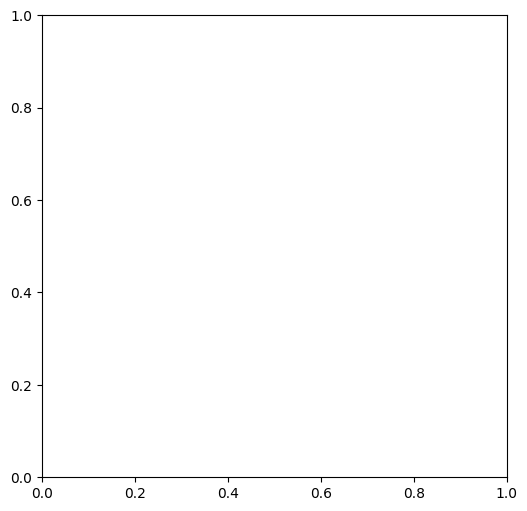

In [70]:
ax = gp.correlation(grid,namex = "OK*estim",namey="lessSmall*estim", 
                    bins=100, bissLine=True, flagSameAxes=True, cmin=1)
ax.decoration(title="Comparing Estimations", xlabel="Unique", ylabel="Moving")

## Corrélation entre les variables

In [141]:
# Fonction pour calculer la distance entre deux points à partir des coordonnées latitude/longitude
def haversine(lat1, lon1, lat2, lon2):
    # Rayon de la Terre en kilomètres
    R = 6371.0
    
    # Conversion des degrés en radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Différences entre les coordonnées
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Formule de Haversine
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # Distance en kilomètres
    distance = R * c
    return distance

In [6]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    """
    Fonction pour calculer la distance entre deux points à partir des coordonnées latitude/longitude.
    """
    R = 6371.0  # Rayon de la Terre en kilomètres
    
    # Conversion des degrés en radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Différences entre les coordonnées
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Formule de Haversine
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # Distance en kilomètres
    distance = R * c
    return distance

def correlation_coloc(df1, df2, var1, var2, epsilon):
    """
    Fonction pour trouver la corrélation entre les points les plus proches de deux dataframes.
    
    Paramètres :
    - df1 : Premier dataframe contenant les colonnes 'lat', 'lon' et 'var1'
    - df2 : Second dataframe contenant les colonnes 'lat', 'lon' et 'var2'
    - var1 : Nom de la variable principale dans df1
    - var2 : Nom de la variable secondaire dans df2
    - epsilon : Distance maximale tolérée pour considérer une corrélation
    
    Retourne :
    - df_corr : Dataframe contenant les colonnes 'var1' et 'var2'
    - Affiche un graphique de corrélation entre les deux variables
    """
    data = []
    
    # Pour chaque point de df1, trouver le point le plus proche dans df2
    for i, row1 in df1.iterrows():
        lat1, lon1, value1 = row1['lat'], row1['lon'], row1[var1]
        
        # Calculer la distance entre ce point et tous les points de df2
        distances = df2.apply(lambda row2: haversine(lat1, lon1, row2['lat'], row2['lon']), axis=1)
        
        # Trouver la distance minimale et l'index du point le plus proche
        min_distance_idx = distances.idxmin()
        min_distance = distances[min_distance_idx]
        
        # Si la distance minimale est inférieure à epsilon, stocker la valeur, sinon NaN
        if min_distance <= epsilon:
            value2 = df2.loc[min_distance_idx, var2]
        else:
            value2 = np.nan
        
        # Ajouter les valeurs correspondantes dans la liste de données
        data.append({var1: value1, var2: value2})
    
    # Créer le dataframe final avec les valeurs de corrélation
    df_corr = pd.DataFrame(data)
    
    # Plot de la corrélation entre les deux variables
    plt.figure(figsize=(10, 6))
    plt.scatter(df_corr[var1], df_corr[var2], alpha=0.6)
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f"Corrélation entre {var1} et {var2} (epsilon = {epsilon} km)")
    plt.grid(True)
    plt.show()
    
    return df_corr

# Exemple d'utilisation :
# df_corr = correlation_coloc(df1, df2, 'variable_principale', 'variable_secondaire', 10)
# print(df_corr)

In [4]:
df_db

lat       lon  pfas_sum
194750  41.392351  9.165047       4.1
194743  41.695461  8.948481       0.0
325551  41.718255  9.303876       0.0
194730  41.754673  8.859828       0.0
325421  41.768722  9.173763       0.0
...           ...       ...       ...
159310  50.787268  1.975412       0.0
159329  50.798708  2.143868       0.0
159250  50.834486  1.686862       0.0
159292  50.894631  1.839508       0.0
159230  50.934294  1.765432       0.0

[4120 rows x 3 columns]

In [5]:
df_pluie = pd.read_parquet(r'data\rr_annuel.parquet')
df_pluie

id       lon        lat  \
0      1014002  5.669000  46.278167   
1      1034004  5.688000  45.769333   
2      1064001  5.487167  45.777167   
3      1071001  6.080333  46.310333   
4      1072001  5.287667  46.204333   
...        ...       ...        ...   
1963  95446001  2.154333  49.114000   
1964  95492001  2.406667  49.040333   
1965  95527001  2.534333  49.015167   
1966  95580001  2.550667  49.085667   
1967  95690001  1.830667  49.108167   

                                               geometry     POSTE      RR  
0     b'\x01\x01\x00\x00\x00\xdd$\xf9b<B#A\x93\xb5\x...   1014002  1413.8  
1     b'\x01\x01\x00\x00\x00\xb7\xca\xfa\x86\xc2R#A\...   1034004  1179.9  
2     b'\x01\x01\x00\x00\x00\x90\x0c\xceE\x19\xa4"A\...   1064001  1182.6  
3     b'\x01\x01\x00\x00\x00\x8du\x96%\xf7\xa7$A\xb6...   1071001  1177.9  
4     b'\x01\x01\x00\x00\x00\x1a\xbf\xbc\xcb\x98\xf6...   1072001  1042.5  
...                                                 ...       ...     ...  
1963  b'\x01\x01\x00\x00\x00\xae\xba=\x05ZF\rA\x11\x...  95446001   476.2  
1964  b'\x01\x01\x00\x00\x00F\xb4\xa0\xc7\x13Z\x10Ad...  95492001   832.0  
1965  b'\x01\x01\x00\x00\x00w\xc7\xe0\xa2"8\x11AQ\xe...  95527001   789.3  
1966  b'\x01\x01\x00\x00\x00\\Pv\xce\x8bT\x11A\x96\x...  95580001   779.3  
1967  b'\x01\x01\x00\x00\x00\xda\x87\x94Xg\xe0\x08A....  95690001   755.7  

[1968 rows x 6 columns]

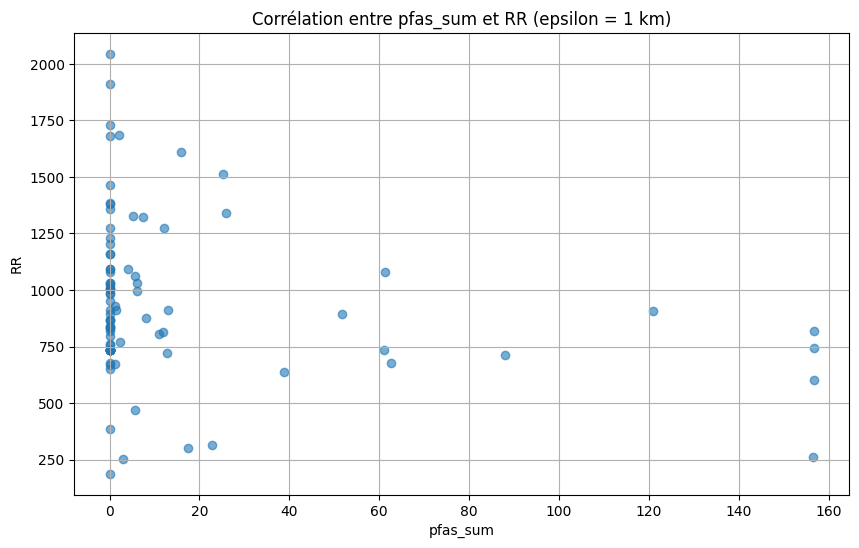

pfas_sum  RR
0          4.1 NaN
1          0.0 NaN
2          0.0 NaN
3          0.0 NaN
4          0.0 NaN
...        ...  ..
4115       0.0 NaN
4116       0.0 NaN
4117       0.0 NaN
4118       0.0 NaN
4119       0.0 NaN

[4120 rows x 2 columns]

In [8]:
correlation_coloc(df_db,df_pluie,'pfas_sum','RR',1)

### Hypothèse : La pluviométrie influe surtout sur la contamination des eaux de surface

Je prends donc mon dataframe contenant seulement les données sur les eaux de surface